# TRABAJO TALLER FINAL DIPLOMADO INTELIGENCIA DE NEGOCIOS
# Parte 3: Clasificación


## LIBRERIAS Y HERRAMIENTAS

In [ ]:
# @markdown Importación de Librerías y Herramientas

# manejo de datos
import numpy as np
import pandas as pd

# hay algunos warnings en la sección de "Desbalance de clases", con estas lineas los omitimos
import warnings
warnings.filterwarnings("ignore")

# imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# transformación
from sklearn.preprocessing import MinMaxScaler

# seleccion de modelos
from sklearn.model_selection import cross_val_score
from sklearn import model_selection 
# metricas
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', palette='inferno')

# desbalance de clases
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# Oversampling
from imblearn.over_sampling import RandomOverSampler
# SMOTE
from imblearn.over_sampling import SMOTE

# indicadores de desempeño
# accuracy
from sklearn.metrics import accuracy_score
# ROC
from sklearn.metrics import roc_curve
# probabilidades de predicción
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score

# seleccion de modelos
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

# matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

# algoritmos
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Logit
from sklearn.linear_model import LogisticRegression
# árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# tree (árbol de decisión gráfico)
from sklearn import tree
# SVM
from sklearn.svm import SVC
# random forest
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# @markdown Matriz de Confusión

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    fig = plt.figure(figsize=(6,6))
    plt.title(title, figure=fig)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, figure=fig)
    plt.yticks(tick_marks, classes, figure=fig)

    # normalized confusion matrix
    ncm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = 0.5
    for i, j in itertools.product(range(ncm.shape[0]), range(ncm.shape[1])):
        plt.text(j, i, str(round(100*ncm[i, j],2))+"%",
                 horizontalalignment="center",
                 color="white" if ncm[i, j] > thresh else "black",
                 fontsize=12, figure=fig)
        plt.text(j, i+0.1, str(cm[i, j]),
                 horizontalalignment="center",
                 color="black",
                 fontsize=10, figure=fig)

    plt.imshow(ncm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1, figure=fig)

    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('True label',figure=fig)
    plt.xlabel('Predicted label',figure=fig)
    plt.close(fig)
    return fig


def get_cm(true_labels, predicted_labels):
    #get confusion matrix
    labels = np.unique(predicted_labels)
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    #get plot of confusion matrix
    plot = plot_confusion_matrix(cm, labels)
    return plot

In [ ]:
def get_cm(true_labels, predicted_labels):
    #get confusion matrix
    labels = np.unique(true_labels) # Antes esta línea tenia lo siguiente: np.unique(predicted_labels)
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    #get plot of confusion matrix
    plot = plot_confusion_matrix(cm, labels)
    return plot

##IMPORTACIÓN Y RECONOCIMIENTO DE DATOS

In [ ]:
#Importación de Datos Procesados

# read data (esta base ya ha sido procesada)
url="https://raw.githubusercontent.com/Mlabrana/BI-Diplo/master/dfpro.csv"
data = pd.read_csv(url, sep=",")
# contar missing values
data.isna().sum()

Unnamed: 0                0
ID                        0
GENERO                    0
EDAD                      0
NIV_EDUC                  0
E_CIVIL                   0
CIUDAD                    0
M_MOROSO                  0
MONTO                     0
SEGURO                    0
FUGA                      0
logVM_MayoAbril           0
logVM_JunioMayo           0
logVM_JulioJunio          0
logVM_AgostoJulio         0
logVM_SeptiembreAgosto    0
logVM_AbrilMarzo          0
Recency                   0
Frecuencia                0
logDMax/Renta             0
logMTD/Renta              0
dtype: int64

In [ ]:
# Reconocimiento de Datos Disponibles
Dat = data.copy()
Dat.describe()

,Unnamed: 0,ID,GENERO,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,M_MOROSO,MONTO,SEGURO,FUGA,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Recency,Frecuencia,logDMax/Renta,logMTD/Renta
count,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000
mean,1146.500000,0.500000,0.391456,0.501510,0.711072,0.169137,0.094082,0.416739,0.396946,0.208370,0.495641,1.422563e-02,0.373903,0.203316,0.131836,0.234713,0.543709,0.926669,0.490223,0.140317,0.152655
std,662.365081,0.288864,0.488182,0.194603,0.258867,0.259469,0.183075,0.250635,0.305724,0.406231,0.500090,6.787073e-02,0.335259,0.279958,0.229348,0.256463,0.343763,0.133027,0.180010,0.159794,0.169038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,573.250000,0.250000,0.000000,0.390244,0.400000,0.000000,0.013514,0.333333,0.160000,0.000000,0.000000,1.558530e-07,0.041155,0.000131,0.000286,0.013884,0.044663,0.888889,0.285714,0.026371,0.029644
50%,1146.500000,0.500000,0.000000,0.512195,0.600000,0.000000,0.013514,0.333333,0.280000,0.000000,0.000000,4.769378e-07,0.422709,0.006710,0.006112,0.058642,0.722565,1.000000,0.571429,0.081204,0.092410
75%,1719.750000,0.750000,1.000000,0.658537,1.000000,0.333333,0.054054,0.666667,0.573333,0.000000,1.000000,6.078084e-06,0.710022,0.422352,0.146299,0.444257,0.813554,1.000000,0.571429,0.193341,0.215853
max,2293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Dat.head(4)

,Unnamed: 0,ID,GENERO,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,M_MOROSO,MONTO,SEGURO,FUGA,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Recency,Frecuencia,logDMax/Renta,logMTD/Renta
0,0,0.000000,0.0,0.390244,0.4,0.0,0.000000,0.666667,0.200000,0.0,0.0,1.550251e-06,0.770767,0.000443,0.161198,0.003107,0.679989,1.000000,0.714286,0.062739,0.068267
1,1,0.000436,1.0,0.634146,0.4,1.0,0.013514,0.333333,0.933333,1.0,0.0,4.143709e-02,0.041155,0.427387,0.001784,0.058642,0.044663,0.777778,0.142857,0.000551,0.000550
2,2,0.000872,0.0,0.390244,0.6,0.0,0.027027,0.333333,1.000000,0.0,0.0,8.806927e-08,0.041155,0.631881,0.391678,0.008863,0.857738,1.000000,0.571429,0.042651,0.044385
3,3,0.001308,1.0,0.317073,1.0,0.0,0.013514,0.333333,0.280000,0.0,0.0,1.165031e-05,0.724422,0.000052,0.000921,0.395344,0.550424,1.000000,0.571429,0.037090,0.037906


In [ ]:
#'FUGA': 1, 'NO FUGA': 0
Dat['FUGA'].unique()

array([0., 1.])

In [ ]:
Dat['FUGA'].replace({1: 'Fuga', 0 :'No Fuga'}, inplace=True)
print(Dat['FUGA'].head(6))
print(Dat['FUGA'].value_counts())
print(Dat['FUGA'].unique())

0    No Fuga
1    No Fuga
2    No Fuga
3    No Fuga
4    No Fuga
5       Fuga
Name: FUGA, dtype: object
No Fuga    1157
Fuga       1137
Name: FUGA, dtype: int64
['No Fuga' 'Fuga']


**Comentario:** \\
La tabla anterior, se puede validar que los datos ya se encentran preprocesados y transformados. De este modo, a continuación se procede a seguir con el Proceso KDD, particularmente, a la etapa de Minería de Datos.

## ENTRENAMIENTO y TESTEO DE MODELOS


### División del Dataset

In [ ]:
Datos = Dat.copy()

In [ ]:
from sklearn.model_selection import train_test_split
# split
#X_train, X_test, y_train, y_test = train_test_split(attributes, target, test_size=0.33, seed) -- forma general
X_train, X_test, y_train, y_test = train_test_split(Datos[Datos.columns.difference(['FUGA'])], Datos['FUGA'], test_size=0.2, random_state=101)

**Comentario:** \\
Construcción de un modelo en dos etapas. Para esto, se divide la base de datos en un conjunto de entrenamiento y un conjunto de testeo. Para esto, se decidió dejar un 80% de los datos para entrenamiento y 20% para testeo donde se valida la efectividad del modelo.

In [ ]:
# @markdown Revisión del tamaño del conjunto de entrenamiento y de testeo
print("Tamaño del set de Entrenamiento y cantidad de atributos", X_train.shape)
print("Tamaño del set de testeo y cantidad de atributos", X_test.shape)

Tamaño del set de Entrenamiento y cantidad de atributos (1835, 20)
Tamaño del set de testeo y cantidad de atributos (459, 20)


***Balance de clases*** \\
Previo al entrenamiento de algoritmos, es útil conocer la distribución de los datos, en relación al balance de clases, tanto para los datos de entrenamiento como testeo, identificando si los clientes fugados son más frecuentes o no. \\
Tenemos que a nivel general, la clase que sí se fuga, representa un 49.56% del total de casos, siendo un 50.08% para el conjunto de entrenamiento y un 47.49% para el conjunto de testeo. Por lo tanto, las clases se consideran balanceadas tanto para el set general de datos, como para las distintas particiones.

In [ ]:
# Balance de clases  
print(f"Estado Inicial Conjunto Entrenamiento: {Counter(y_train)}")
print(f"Estado Inicial Conjunto Testeo:        {Counter(y_test)}")

Estado Inicial Conjunto Entrenamiento: Counter({'Fuga': 919, 'No Fuga': 916})
Estado Inicial Conjunto Testeo:        Counter({'No Fuga': 241, 'Fuga': 218})


**Comentario:** \\
A continuación , se realiza el entranamiento de modelos, con tal de identificar los hiperparámetros más adecuados en cada uno, para posteriormente desarrollar un análisis comparativo, enfocado en identificar los de mejores resultados para la predicción de fuga.

### 1. Modelo KNN

#### Entrenamiento y testeo 

In [ ]:
# Entrenamiento y testeo KNN
# Entrenar Algoritmo para Diferentes Cantidades de Vecinos
#listas a rellenar métricas de desempeño en entrenamiento
accuraciesKNN = []
precisionsKNN = []
recallsKNN = []

#listas a rellenar para métricas de desempeño en testeo
accuraciesKNNt = []
precisionsKNNt = []
recallsKNNt = []

#lista de vecinos para completar 
neighbors = list(range(3,20,2)) # numeros impares de vecinos
for n_neighbor in neighbors:
  
  # train
  knn = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
 
  # predict y guardar accuracy, precision y recall score
  accuraciesKNN.append(accuracy_score(y_train, knn.predict(X_train)))
  precisionsKNN.append(precision_score(y_train, knn.predict(X_train), pos_label="Fuga"))
  recallsKNN.append(recall_score(y_train, knn.predict(X_train), pos_label="Fuga"))
  # test
  accuraciesKNNt.append(accuracy_score(y_test, knn.predict(X_test)))  #usamos el y_test y X_test
  precisionsKNNt.append(precision_score(y_test, knn.predict(X_test), pos_label="Fuga"))
  recallsKNNt.append(recall_score(y_test, knn.predict(X_test), pos_label="Fuga"))


#####Visualización de métricas de desempeño 

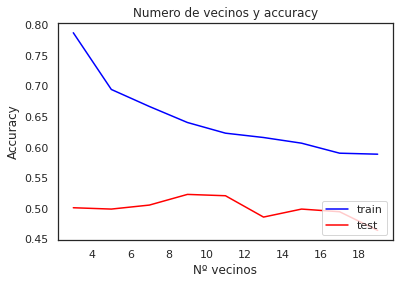

In [ ]:
# Graficar Accuracy
# plot
plt.plot(neighbors,accuraciesKNN, color='blue')
plt.plot(neighbors,accuraciesKNNt, color='red')
plt.title('Numero de vecinos y accuracy')
plt.xlabel('Nº vecinos')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

Accuracy:

Del gráfico es claro ver como la métrica en entrenamiento decae rápidamente a medida que aumenta el número de vecinos considerados para la predicción, estabilizándose alrededor del 0.60 a partir de 17 vecinos en adelante. También es directo observar que los mayores niveles de accuracy en entrenamiento se obtiene para un número de 3 y 5 vecinos aproximadamente.
Por otro lado, la métrica de Accuracy en testeo se mantiene variando acotadamente alredeor de 0.50, a medida que aumenta la cantidad de vecinos considerados para la predicción, decayendo hacia valores cercanos a 0.45, a partir de los 19 vecinos, y obtiene los mejores con resultados para 9 y 11 vecinos.

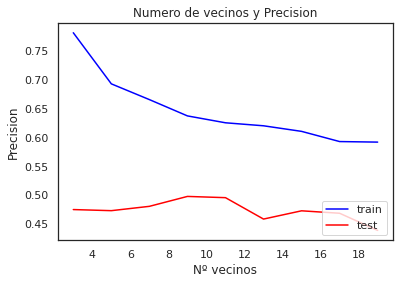

In [ ]:
# Graficar Precision
plt.plot(neighbors,precisionsKNN, color='blue')
plt.plot(neighbors,precisionsKNNt, color='red')
plt.title('Numero de vecinos y Precision')
plt.xlabel('Nº vecinos')
plt.ylabel('Precision')
plt.legend(['train', 'test'], loc='lower right')

Precision:

En el gráfico anterior, observamos cómo la métrica decae a medida que aumenta el número de vecinos en entrenamiento, siendo la tasa de disminución, mayor al comienzo. Particularmente, el menor valor de Precision se alcanza a partir de los 17  vecinos considerados, estabilizándose en 0.60, aproximadamente. Al igual que en el caso anterior, los mejores resultados en Precision se obtienen para 3 y 5 vecinos.
Para el caso de la métrica Precision en testeo, nuevamente se observa un comportamiento fluctuante pero centrado alrededor de 0.475, decayendo hacia sus mínimos a partir de los 19 vecinos. Cabe señalar que el máximo de Precision se alcanza en las predicciones con 9 y 11 vecinos, llegando a un valor de 0.50 aproximadamente.

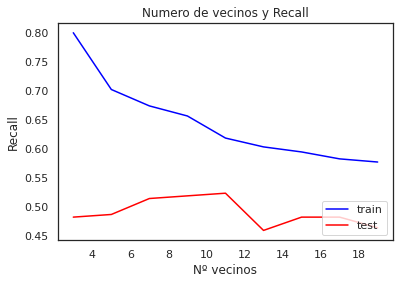

In [ ]:
# Graficar Recall
plt.plot(neighbors,recallsKNN, color='blue')
plt.plot(neighbors,recallsKNNt, color='red')
plt.title('Numero de vecinos y Recall')
plt.xlabel('Nº vecinos')
plt.ylabel('Recall')
plt.legend(['train', 'test'], loc='lower right')

Recall:

El comportamiento de Recall en entrenamiento es descendiente a medida que aumenta el número de vecinos considerados. Se observa además, que las magnitudes del Recall son más cercanas a las de Accuracy, y que los mejores resultados se obtienen nuevamente para los casos en que se consideran 3 y 5 vecinos.
La métrica de Recall en testeo presenta el mismo patrón de comportamiento que los indicadores anteriores, centrándose en valores cercanos a 0.50 o levemente más bajos, presentando un aumento inicial desde los 3 hasta 11 vecinos, punto en el que logra su máximo con un valor de 0.53 aproximadamente, para luego decaer, entregando mínimos en 13 y 19 vecinos.

**A modo resumen:** los resultados anteriores, para el entrenamiento del algoritmo KNN, el mejor resultado, en sus distintas métricas, se obtiene para la predicción utilizando 3 vecinos en cada caso. No obstante, se observa que para las métricas de desempeño en testeo, las medidas de Accuracy, Precisión y Recall disminuyen su magnitud, además de tener un compartimiento diferente, pues parece mejorar el desempeño con un conjunto de vecidos cercano a 11. 

##### Evaluación del Algoritmo en Test

Dados los resultados anteriores, a nivel general se puede identificar que para el algoritmo KNN, los mejores resultados para el Entrenamiento se logran considerando 3 vecinos. Por su parte, para el Testeo, el algoritmo se desempeña mejor al incluir alrededor de 11 vecinos para las predicciones.

Entendiendo que lo relevante es poder lograr mejores resultados sobre los datos de Testeo, es que para el modelo KNN, se termina asignando al hiperparámetro de número de vecinos, el valor de 11.

De este modo, se presentan a continuación los resultados obtenidos para KNN con el modelo de predicción utilizando 11 vecinos.

In [ ]:
# @markdown Reporte de Clasificación en Testeo
model1 = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(set(y_train))))

              precision    recall  f1-score   support

     No Fuga       0.50      0.52      0.51       218
        Fuga       0.55      0.52      0.53       241

    accuracy                           0.52       459
   macro avg       0.52      0.52      0.52       459
weighted avg       0.52      0.52      0.52       459



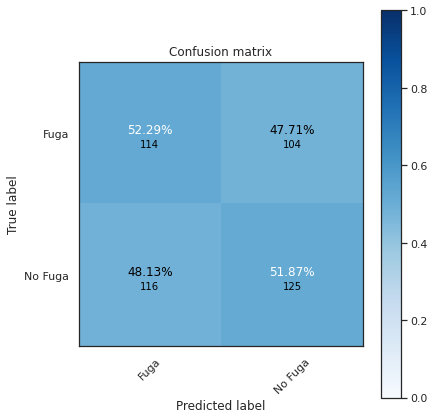

In [ ]:
# @markdown Matriz de Confusión
get_cm(y_test, y_pred)

**Comentario**: \\
De la Matriz de Confusión anterior, se aprecia que existe una gran cantidad de fallos en la predicción, tanto para los casos positivos como negativos. De forma complementaria, los aciertos para la condición de fuga y no fuga son levemente superiores al 50% de los casos.

### 2. Modelo Árbol de Decisión

#### Entrenamiento y testeo 

In [ ]:
# Entrenamiento y testeo Árbol de Decisión
# Entrenar el Algoritmo para Distintos Niveles de Profundidad del Método
accuraciesTREE = []
precisionsTREE = []
recallsTREE = []
# testear Algoritmo para Diferentes Cantidades de Vecinos
accuraciesTREEt = []
precisionsTREEt = []
recallsTREEt = []
depths = list(range(2,30))
for depth in depths:
  # train
  TREE = DecisionTreeClassifier(random_state=0, max_depth = depth).fit(X_train,y_train)
  # predict y guardar accuracy, precision y recall score
  accuraciesTREE.append(accuracy_score(y_train, TREE.predict(X_train)))
  precisionsTREE.append(precision_score(y_train, TREE.predict(X_train), pos_label='Fuga'))
  recallsTREE.append(recall_score(y_train, TREE.predict(X_train), pos_label='Fuga'))
  # test
   # predict y guardar accuracy, precision y recall score
  accuraciesTREEt.append(accuracy_score(y_test, TREE.predict(X_test)))
  precisionsTREEt.append(precision_score(y_test, TREE.predict(X_test), pos_label='Fuga'))
  recallsTREEt.append(recall_score(y_test, TREE.predict(X_test), pos_label='Fuga'))

####Visualización de métricas de desempeño 

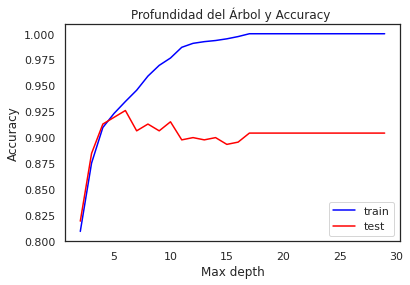

In [ ]:
# Graficar Accuracy
plt.plot(depths,accuraciesTREE, color='blue')
plt.plot(depths,accuraciesTREEt, color='red')
plt.title('Profundidad del Árbol y Accuracy ')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

Accuracy:

En el gráfico se observa que la métrica de Accuracy en entrenamiento aumenta monótonamente a medida que crece la profundidad del árbol, hasta estabilizarse en el valor máximo posible, a partir del nivel de profundidad 16. Como ya sabemos, este tipo de modelo es sesibles al sobreajuste cuando aumenta el número de ramificaciones.
Con respecto a la métrica de Accuracy en testeo, se observa un comportamiento variable, que crece fuertemente en en los primeros niveles de profundidad hasta alcanzar el máximo global en 6, un un valor de 0.925, para luego disminuir, pasando por una alternancia de aumentos y disminuciones locales de su valor, hasta estabilizarse en 0.91, para profundidades de 17 niveles hacia arriba.

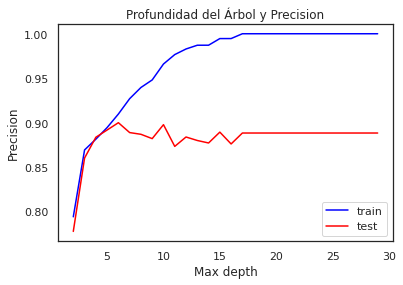

In [ ]:
# Graficar Precision
plt.plot(depths,precisionsTREE, color='blue')
plt.plot(depths,precisionsTREEt, color='red')
plt.title('Profundidad del Árbol y Precision')
plt.xlabel('Max depth')
plt.ylabel('Precision')
plt.legend(['train', 'test'], loc='lower right')

Precision:

Se puede observar que la métrica de Precision en entrenamiento aumenta de forma continua al hacer crecer la profundidad del método, hasta estabilizarse en el nivel máximo posible, a partir de 16 o 17 niveles de profundidad.
Respecto a la métrica de Precision en testeo, esta presenta un comportamiento variable, que aumenta en las primeras profundizaciones del modelo, alcanzado su máximo global en 6 niveles, entregando en dicho caso una métrica de 0.90, para posteriormente disminuir, alternando entre reducciones y aumentos menores del indicador, hasta estabilizarse en un valor cercano a 0.88, para profundidadez de 17 o más niveles.

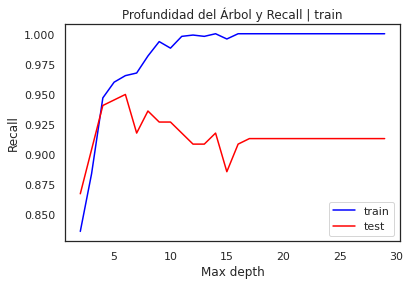

In [ ]:
# Graficar Recall
plt.plot(depths,recallsTREE, color='blue')
plt.plot(depths,recallsTREEt, color='red')
plt.title('Profundidad del Árbol y Recall | train')
plt.xlabel('Max depth')
plt.ylabel('Recall')
plt.legend(['train', 'test'], loc='lower right')

Recall:

En el gráfico se muestra que la métrica de Recall en entrenamiento aumenta de forma muy rápida en los primeros niveles de profundidad, hasta valores de 0.95 en 4 ramificaciones, para luego seguir creciendo hasta el máximo posible de 1, al utilizar 16 niveles de profundidad.
La métrica de Recall en testeo presenta un comportamiento, en general, similar al de las métricas anteriores, pero más acentuado, dado que crece hasta caso 0.95 con 6 ramificaciones, siendo este punto el máximo global, para luego disminuir mediante un comportamiento alternado, reduciéndose de forma general, hasta estabilizarse cerca de los 0.91, para profundidades del árbol de más de 17 niveles.

**A modo resumen:** los resultados anteriores, a nivel general se puede identificar que para el algoritmo Árbol de Decisión, los mejores resultados para el Entrenamiento se logran considerando 17 niveles de profundidad, instancia en que se alcanza el máximo posible para las 3 métricas estudiadas. Por su parte, para el Testeo, el algoritmo se desempeña mejor al utilizar 6 niveles de profundidas para los análisis predictivos.



#### Evaluación del Algoritmo en Test

Entendiendo que lo relevante es poder lograr mejores resultados sobre los datos de Testeo, es que para el modelo Árbol de Decisión, se termina asignando al hiperparámetro de profundidad máxima, el valor de 6.

Es importante señalar, que el desempeño del modelo predictivo es menor para el caso del Testeo, reduciendo la magnitud de sus 3 métricas principales, en una variación cercana al 10%, lo que no representa un indicio de sobreajuste del modelo.

De este modo, se presentan a continuación los resultados obtenidos para Árbol de Decisión con el modelo de predicción utilizando 6 niveles de profundidad.

In [ ]:
# @markdown Reporte de Clasificación en Testeo
model2 = DecisionTreeClassifier(random_state=0, max_depth = 6).fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2, target_names=list(set(y_train))))

              precision    recall  f1-score   support

     No Fuga       0.90      0.95      0.92       218
        Fuga       0.95      0.90      0.93       241

    accuracy                           0.93       459
   macro avg       0.93      0.93      0.93       459
weighted avg       0.93      0.93      0.93       459



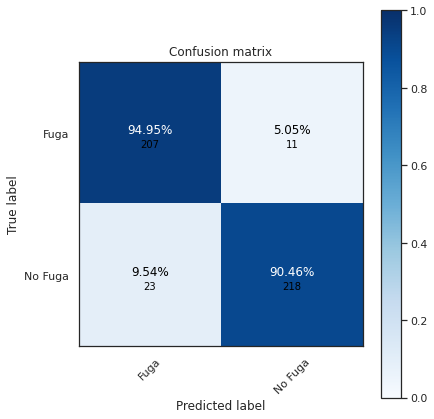

In [ ]:
# @markdown Matriz de Confusión
get_cm(y_test, y_pred2)

**Comentario:** \\
De la Matriz de Confusión anterior, podemos observar que los mayores fallos de predicción, se generan en los casos en que el cliente realmente no fuga y el modelo predice que sí lo hará. De forma complementaria, los mayores aciertos son para los casos de Verdaderos Positivos, con un porcentaje de acierto de casi el 95%, considerando además que los Verdaderos Negativos superan el 90% de acierto en su clasificación.

### 3. Modelo SVM

#### Entrenamiento y testeo 

In [ ]:
#  Entrenar y testear SVM
# train for diferent number of C
accuracieSVM = []
precisionsSVM = []
recallsSVM = []
# test for diferent number of C
accuracieSVMt = []
precisionsSVMt = []
recallsSVMt = []
# valores para C
C = np.linspace(0.1,2,10)
for c in C:
  # train
  SVM = SVC(random_state=0, C=c, kernel='linear').fit(X_train,y_train)
  # predict y guardar accuracy, precision y recall
  accuracieSVM.append(accuracy_score(y_train, SVM.predict(X_train)))
  precisionsSVM.append(precision_score(y_train, SVM.predict(X_train), pos_label='Fuga'))
  recallsSVM.append(recall_score(y_train, SVM.predict(X_train), pos_label='Fuga'))
  # predict y guardar accuracy, precision y recall
  accuracieSVMt.append(accuracy_score(y_test, SVM.predict(X_test)))
  precisionsSVMt.append(precision_score(y_test, SVM.predict(X_test), pos_label='Fuga'))
  recallsSVMt.append(recall_score(y_test, SVM.predict(X_test), pos_label='Fuga'))

####Visualización de métricas de desempeño 

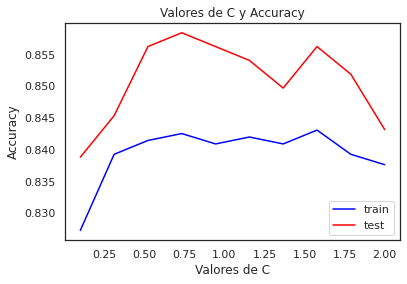

In [ ]:
# Graficar Accuracy
plt.plot(C,accuracieSVM, color='blue')
plt.plot(C,accuracieSVMt, color='red')
plt.title('Valores de C y Accuracy')
plt.xlabel('Valores de C')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

Accuracy:

En el gráfico se observa que la métrica de Accuracy en entrenamiento aumenta de forma rápida en un comienzo, para luego estabilizarse en un nivel cercano a 0.840 para valores de C superiores a 0.30, considerando que en estricto rigor, su aumento continuo se da hasta un valor de C igual a 0.75, donde se logra una métrica de 0.842 aproximadamente. El máximo Accuracy se obtiene para C alrededor de 1.60, aproximadamente.
Para la métrica de Accuracy en testeo, también se observa que aumenta de forma importante entre el rango de valores para C correspondiente a 0.1 y 0.75, alcanzando una magnitud levemente inferior a 0.860. Luego, la métrica decae hasta 0.850 para valores de C sobre 1.30, desde donde luego vuelve a aumentar, para disminuir finalmente hasta el mínimo dentro del rango analizado, con C igual a 2.00, donde se alcanza una métrica de 0.843 aproximadamente.

Cade destacar el hecho de que, para esta métrica, los resultados obtenidos son mejores en el conjunto de testeo que en el de entrenamiento, considerando que dicha diferencia no es mayor al 2% como máximo. De este modo, se considera un resultado dentro de rangos normales, sin corresponder a underfitting.

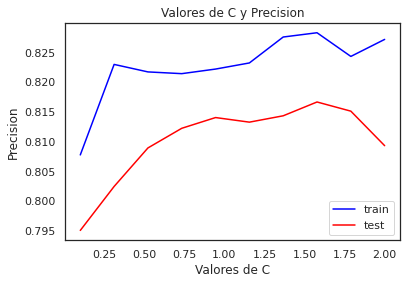

In [ ]:
# Graficar Precision
plt.plot(C,precisionsSVM, color='blue')
plt.plot(C,precisionsSVMt, color='red')
plt.title('Valores de C y Precision')
plt.xlabel('Valores de C')
plt.ylabel('Precision')
plt.legend(['train', 'test'], loc='lower right')

Precision:

Se aprecia que el valor de la métrica Precision en entrenamiento aumenta a medida que aumenta el valor de C, alcanzando su valor máximo cercano a 0.84 para C igual que 1.60, después del cual posee un comportamiento variable en lo que resta de intervalo estudiado.
En el caso de la métrica de Precision en testeo, ésta presenta a grandes rasgos un comportamiento similar, con tasas de crecimiento diferentes, en donde aumenta hasta su valor máximo, correspondiente a 0.815 para una magnitud de C igual a 1.60, a partir de la cual disminuye.

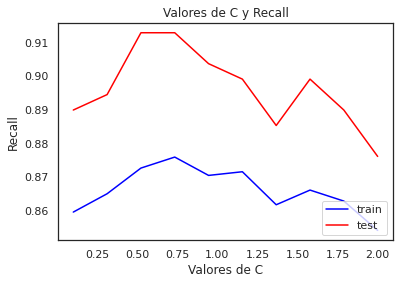

In [ ]:
# Graficar Recall
plt.plot(C,recallsSVM, color='blue')
plt.plot(C,recallsSVMt, color='red')
plt.title('Valores de C y Recall')
plt.xlabel('Valores de C')
plt.ylabel('Recall')
plt.legend(['train', 'test'], loc='lower right')

Recall:

Es observable que para el caso de entrenamiento, la métrica de Recall posee de forma general un comportamiento descrito por una curva cóncava, donde aumenta inicialmente hasta un máximo de 0.877 aproximadamente, para un valor de C igual a 0.75, a partir de donde comienza a disminuir, hasta llegar a su magnitud más baja, para valor de C igual a 2. Para el caso de testeo, la curva es similar pero más acentuada, alcanzando su máxima magnitud, correspondiente a 0.915, para valores de C entre 0.5 y 0.75, a partir de donde disminuye, hasta cerca de 0.885, en C igual a 1.3, para después volver a aumentar, alcanzar un máximo local, naturalmente menor que el anterior, y luego volver a reducir su magnitud hasta el mínimo, menor a 0.88, para C igual a 2.

De manera análoga al Accuracy, la curva de la métrica de Recall obtenida presenta resultados mejores en el conjunto de testeo que en el de entrenamiento, considerando que dicha diferencia no es mayor al 5% como máximo. De este modo, se considera un resultado dentro de rangos normales, sin corresponder a underfitting.


**A modo resumen:** Dados los resultados anteriores, a nivel general se puede identificar que para el algoritmo SVM, los mejores resultados para el Entrenamiento se logran en diferentes valores de C, dependiendo de la métrica estudiada. Un valor de dicho hiperparámetro igual a 0.75, permitiría obtener buenos valores de Accuracy y Recall, castigando un poco Precision, en relación con el máximo posible obtenible para dicha métrica. Por su parte, para el Testeo, el comportamiento del algoritmo es similar en cuanto a su naturaleza que en el caso Entrenamiento, puesto que las métricas de Accuracy y Recall logran los mejores resultados para valores de C cercanos a 0.75 para los análisis predictivos, con una métrica de Precision algo alejada de su máximo posible, afectada en su segundo decimal, en cuanto a magnitud.

#### Evaluación del Algoritmo en Test

Entendiendo que lo relevante es poder lograr mejores resultados sobre los datos de Testeo, es que para el modelo SVM, se termina asignando al hiperparámetro C, el valor de 0.75.

De este modo, se presentan a continuación los resultados obtenidos para SVM con el modelo de predicción utilizando un C igual a 0.75.

In [ ]:
# @markdown Reporte de Clasificación en Testeo
model3 = SVC(random_state=0, C=0.75, kernel='linear').fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3, target_names=list(set(y_train))))

              precision    recall  f1-score   support

     No Fuga       0.81      0.91      0.86       218
        Fuga       0.91      0.81      0.86       241

    accuracy                           0.86       459
   macro avg       0.86      0.86      0.86       459
weighted avg       0.86      0.86      0.86       459



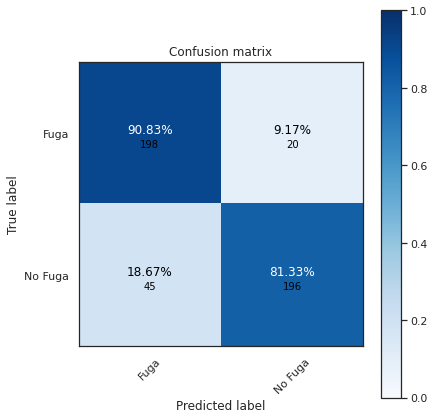

In [ ]:
# @markdown Matriz de Confusión
get_cm(y_test, y_pred3)

**Comentario:** \\
De la Matriz de Confusión anterior, podemos observar que los mayores fallos de predicción, se generan en los casos en que el cliente realmente no fuga y el modelo predice que sí lo hará, con casi un 19% de los casos. A su vez, los mayores aciertos son para los casos de Verdaderos Positivos, con un porcentaje de acierto de casi el 91%, considerando además que los Verdaderos Negativos superan el 81% de acierto en su clasificación.

### 4. Modelo Random Forest

#### Entrenamiento y testeo 

In [ ]:
# Entrenar y testear Random Forest
# Entrenar para diferentes Números de Árboles
accuraciesRF = []
precisionsRF = []
recallsRF = []
# testear para diferentes Números de Árboles
accuraciesRFt = []
precisionsRFt = []
recallsRFt = []
# Número de árboles 
n_estimators = list(range(2,21,2))
for n_estimator in n_estimators:
  # train
  RF = RandomForestClassifier(n_estimators=n_estimator, random_state=0, n_jobs=-1).fit(X_train,y_train)
  # predict y guardar accuracy, precision y recall
  accuraciesRF.append(accuracy_score(y_train, RF.predict(X_train)))
  precisionsRF.append(precision_score(y_train, RF.predict(X_train), pos_label='Fuga'))
  recallsRF.append(recall_score(y_train, RF.predict(X_train),pos_label='Fuga'))
  # predict y guardar accuracy, precision y recall
  accuraciesRFt.append(accuracy_score(y_test, RF.predict(X_test)))
  precisionsRFt.append(precision_score(y_test, RF.predict(X_test), pos_label='Fuga'))
  recallsRFt.append(recall_score(y_test, RF.predict(X_test),pos_label='Fuga'))

####Visualización de métricas de desempeño 

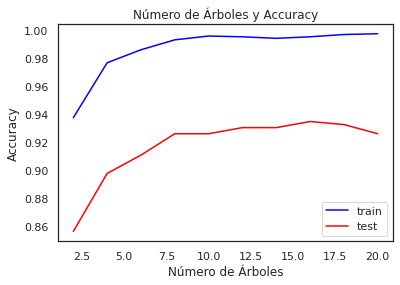

In [ ]:
# Graficar Accuracy
plt.plot(n_estimators,accuraciesRF, color='blue')
plt.plot(n_estimators,accuraciesRFt, color='red')
plt.title('Número de Árboles y Accuracy')
plt.xlabel('Número de Árboles')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

Accuracy:

En el gráfico se observa que la métrica de Accuracy presenta un comportamiento estrictamente creciente, convergiendo al máximo posible, correspondiente a 1, a medida que aumenta el número de árboles utilizados en el método, puntualmente, cercano a 20 estimadores.
A diferencia de la situación de Entrenamiento, para el caso del Testeo, la métrica de Accuracy cae alrededor de 8% en sus valores, logrando un máximo de casi 0.935 para 16 árboles estimadores. A nivel general, la métrica aumenta a medida que crece el número de árboles utilizados, pero manteniéndose dentro de un rango acotado entre 0.92 y 0.94, a partir de 8 estimadores.

Precision:

Del gráfico, tenemos que el comportamiento general es muy similar al del Accuracy, en ambas aprticiones de datos. Específicamente, se obtienen valores muy altos para la métrica de Precision en entrenamiento, en todo el rango de número de árboles analizado para el modelo, creciendo hasta el máximo posible alredeor de los 10 árboles utilizados, en donde se mantiene con mínimas variaciones de desempeño, hasta el final del rango de cantidad de predictores, siempre con una métrica cercana o igual a 1.
Para la métrica de Precision en testeo, se observa también un crecimiento general hasta llegar alrededor 0.915, para 16 árboles, a partir de donde diminuye, pero levemente, manteniéndose cercano a 0.91 hasta el máximo de árboles analizados.

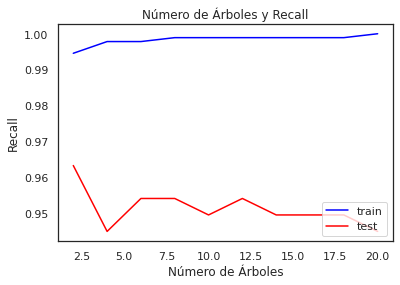

In [ ]:
# Graficar Recall
plt.plot(n_estimators,recallsRF, color='blue')
plt.plot(n_estimators,recallsRFt, color='red')
plt.title('Número de Árboles y Recall')
plt.xlabel('Número de Árboles')
plt.ylabel('Recall')
plt.legend(['train', 'test'], loc='lower right')

Recall:

Para la métrica de Recall en entrenamiento, se aprecia un comportamiento casi constante en todo el rango de estimadores analizado, partiendo desde 0.995 desde los 2 árboles utilizados, llegando a 1 para los 20 predictores en conjunto.
En el caso de la métrica de Recall en testeo, observamos un comportamiento distinto, en donde a nivel general, la métrica decae desde el máximo, al utilizar 2 árboles, en donde la magnitud del recall es de 0.965 aproximadamente, para luego ir mostrando un comportamiento variable, con una tendencia a la disminución hasta valores cercanos a 0.945, con el uso de 20 árboles.

Es importante destacar que si bien los comportamientos de las curvas de Recall son bastente diferentes, la disminución de la métrica desde el caso de entrenamiento al de testeo, es cercana al 5% solamente.

**A modo resumen:**
De los resultados anteriores, se puede observar que para el modelo de Random Forest, se obtienen altísimos desempeños en el entrenamiento, percibible mediante todas sus métricas, las que convergen a 1 para cerca de 10 estimadores utilizados, entregando también buenos resultados ya desde el caso base de 2 árboles, en cuya situación es el Recall el que muestra el desempeño más alto, relativamente hablando, logrando un valor cercano 0.995 aproximadamente. Por su parte para el Testeo, el comportamiento predictivo del modelo es más bajo en cuanto a la magnitud de sus tres métricas, las que caen no más de 10% en comparación al caso anterior. Puntualmente, los mejores resultados de Testeo se obtienen para 16 estimadores en Accuracy y Precision, siendo el Recall levemente afectado, logrando un valor de 0.95 aproximadamente.


#### Evaluación del Algoritmo en Test

Teniendo en cuenta que el modelo de Random Forest es susceptible al sobreajuste, cabe mencionar que en el presente caso se desecha esa indeseada situación, puesto que las reducciones de las métricas al pasar de un conjunto de datos al otro, se encuentran dentro de un margen "normal" de predicción.

De este modo, se presentan a continuación los resultados obtenidos para Random forest con el modelo de predicción utilizando 16 árboles de decisión. 

In [ ]:
# @markdown Reporte de Clasificación en Testeo
model4 = RandomForestClassifier(n_estimators=16, random_state=0, n_jobs=-1).fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4, target_names=list(set(y_train))))

              precision    recall  f1-score   support

     No Fuga       0.92      0.95      0.93       218
        Fuga       0.95      0.92      0.94       241

    accuracy                           0.93       459
   macro avg       0.93      0.94      0.93       459
weighted avg       0.94      0.93      0.93       459



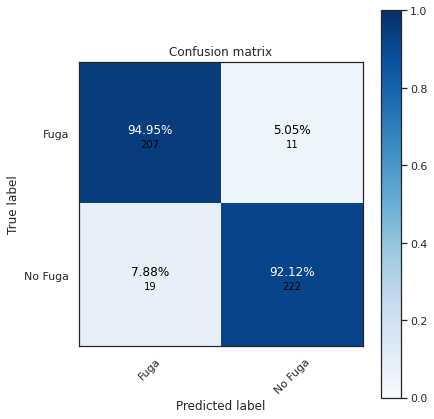

In [ ]:
# @markdown Matriz de Confusión
get_cm(y_test, y_pred4)


**Comentario:** \\
De la Matriz de Confusión anterior, podemos observar que los mayores fallos de predicción, se generan en los casos en que el cliente realmente no fuga y el modelo predice que sí lo hará. Por su parte, los Falsos Negativos apenas superan el 5%. De forma complementaria, los mayores aciertos son para los casos de Verdaderos Positivos, con un porcentaje de acierto de casi el 95%, donde además los Verdaderos Negativos superan el 92% de acierto en su clasificación.

### 5. Modelo Regresión Logística

#### Entrenamiento y testeo

In [ ]:
# Entrenamiento y Testeo Regresión Logística
# train
logit = LogisticRegression(random_state=0).fit(X_train, y_train)
# accuracy
print(f"Accuracy train: {accuracy_score(y_train, logit.predict(X_train)).round(4)}")
print(f"Accuracy test : {accuracy_score(y_test, logit.predict(X_test)).round(4)}")
print(f"Accuracy train: {precision_score(y_train, logit.predict(X_train), pos_label='Fuga').round(4)}")
print(f"Accuracy test : {precision_score(y_test, logit.predict(X_test), pos_label='Fuga').round(4)}")
print(f"Accuracy train: {recall_score(y_train, logit.predict(X_train), pos_label='Fuga').round(4)}")
print(f"Accuracy test : {recall_score(y_test, logit.predict(X_test), pos_label='Fuga').round(4)}")

Accuracy train: 0.8327
Accuracy test : 0.8388
Accuracy train: 0.8248
Accuracy test : 0.8077
Accuracy train: 0.8455
Accuracy test : 0.867


#### Evaluació del Algoritmo en Test

In [ ]:
# @markdown Reporte de Clasificación en Testeo
model5 = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5, target_names=list(set(y_train))))

              precision    recall  f1-score   support

     No Fuga       0.81      0.87      0.84       218
        Fuga       0.87      0.81      0.84       241

    accuracy                           0.84       459
   macro avg       0.84      0.84      0.84       459
weighted avg       0.84      0.84      0.84       459



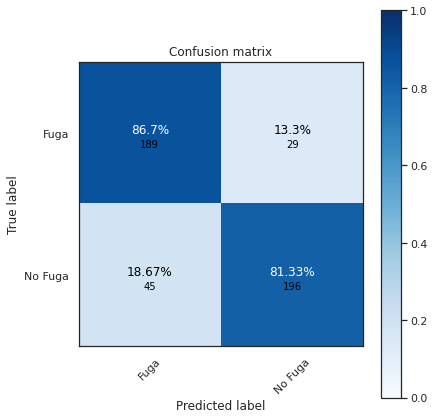

In [ ]:
# @markdown Matriz de Confusión
get_cm(y_test, y_pred5)

**Comentario:** \\
De la Matriz de Confusión anterior, podemos observar que los mayores fallos de predicción, se generan en los casos en que el cliente realmente no fuga y el modelo predice que sí lo hará, elevándose sobre el 18%, siendo también importantes los Falsos Negativos, que llegan al 13%. De forma complementaria, los mayores aciertos son para los casos de Verdaderos Positivos, con un porcentaje de acierto de casi el 86%, donde además los Verdaderos Negativos alcanzan el 81% de acierto en su clasificación.

## PROBABILIDADES DE PREDICCIÓN DE CLASES EN MODELOS

### Análisis de Umbral de Clases y AUC/ROC

#### Predicción de Clases en Testeo

Considerando que el conjunto de Testeo es donde finalmente se ponen a prueba los modelos predictivos antes de ser aplicados en casos reales, y que por lo mismo es necesario alcanzar buenos resultados en un conjunto "desconocido" de datos para los algoritmos de predicción, se ajustará en el desarrollo siguiente, el umbral de corte probabilístico para la clasificación de los distintos registros para las clases de clientes con y sin fuga.

Desde un punto de vista de negocio, lo relevante es optimizar el beneficio económico de las iniciativas que se desarrollan, en particular, para un proyecto de analítica de negocios mediante KDD.

De esta forma, tenemos que de la Matriz de Beneficios, se desprende la siguiente Función de Beneficios:



*   Función de Beneficios: FB = 100xTP - 100xFP - 5000xFN - 0xTN



Como se puede observar, la función de beneficio es agnóstica del modelo predictivo, teniendo presente obviamente que cada algoritmo podrá predecir de mejor o peor manera la condición de fuga o no fuga, según sus parámetros, hiperparámetros y funcionamiento específico.

Ahora, dado el tamaño de la partición de datos, específicamente para el conjunto de testeo, veíamos anteriormente que la cantidad real de casos de la Clase 1, que son los clientes que fugan, es de 218. De este modo, tenemos que:


*   TP + FN = 218

A partir de aquí, podemos utilizar esta igualdad para reemplazar en la expresión de la función de beneficios FB, de modo que, junto con reducir aritméticamente la expresión, se obtiene que:


*   Función Beneficios: FB = 218.000 - 6.000xFN -100xFP





En la expresión anterior tenemos convenientemente que la función de beneficios está expresada como función de los errores de la predicción de los modelos.

Desde un punto de vista de optimización de dicha función, si calculamos el gradiente, mediante derivadas parciales, tenemos que el vector gradiente de FB está dado por:

FB' = (-6.000 ; -100)

Dicho vector existe en el espacio bidimensional dado por la cantidad de casos Falsos Negativos y Falsos Positivos. Particularmente, indica la dirección en que la función FB se optimiza.

Como FN y FP están acompañados de coeficientes negativos, y además no pueden ser valores menores a cero, puesto que el modelo a lo más puede entregar cero casos para cada uno de estos tipos de errores, la función FB se hace mayor a medida que las cantidades de FN y FP se acercan a cero, alcanzado su máximo en el punto (0 ; 0) del espacio bidimensional de errores tipo I y tipo II.

El resultado de la optimización de la función de beneficios nos orienta a que, desde un punto de vista de negocios, el máximo beneficio se alcanza cuando no incurrimos en errores de predicción. Más aún, teniendo en cuenta que el costo de incurrir en un Falso Negativo es mucho mayor que el costo de incurrir en un Falso Positivo, esto nos orienta que debemos evitar fuertemente incurrir en predicciones de falsos negativos.

De este modo, con tal de maximizar el beneficio para la organziación, contamos con un criterio económico para orientar la selección del umbral de corte de clases en todos los modelos, dado por el punto que no entregue falsos negativos.

Lo anterior se traduce en establecer el umbral de corte en el punto en que la distribución de probabilidades entregada por cada modelo, incorpore dentro de la Clase 1 Fuga a todos los casos existentes.

Al establecer el criterio económico anterior, en la práctica se disminuirán las pérdidas monetarias que entregue cada modelo, diferenciándose los modelos predictivos entre ellos por el aporte que puedan hacer en la correcta identificación de los otros casos (Verdaderos Positivos y Falsos Positivos).

A continuación se desarrolla el ajuste del umbral de corte de predicciónd de clases para los modelos antes entrenados, buscando eliminar los casos FN, que generan la mayor pérdida monetaria.

###### Modelo KNN

In [ ]:
# @title Generación de Dataframes de Entrenamiento y Testeo
DFTrain = pd.concat([X_train,y_train], axis=1)
DFTest = pd.concat([X_test,y_test], axis=1)
print(f"Filas Dataframe Entrenamiento: {len(DFTrain)}")
print(f"Filas Dataframe Testeo       : {len(DFTest)}")

Filas Dataframe Entrenamiento: 1835
Filas Dataframe Testeo       : 459


In [ ]:
# @title Determinación de Probabilidades de Predicción según Clases
# Entrenamos KNN con mejor configuración
KNNauct = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)
# Calcular Probabilidades de Predicción
DFKNNt = DFTest.copy()
DFKNNt[['Fuga','No Fuga']] = KNNauct.predict_proba(X_test)
DFKNNt.head()

,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,0.545455,0.454545
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.363636,0.636364
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.727273,0.272727
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.818182,0.181818
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.727273,0.272727


In [ ]:
# @title Fijación de Umbral Probabilístico de Clases
# definimos el umbral desde el cual diremos que una persona pertenece a una clase u otra
threshold1t = 0.1
# creamos nueva columna de predicción
DFKNNt['Predict'] = np.where(DFKNNt['Fuga']>threshold1t, "Fuga", "No Fuga")
# métricas
print(f"Accuracy  : {round(accuracy_score(DFKNNt['FUGA'], DFKNNt['Predict']),3)}")
print(f"Precision : {round(precision_score(DFKNNt['FUGA'], DFKNNt['Predict'], average='macro'),3)}")
print(f"Recall    : {round(recall_score(DFKNNt['FUGA'], DFKNNt['Predict'], average='macro'),3)}")
DFKNNt.head()

Accuracy  : 0.475
Precision : 0.237
Recall    : 0.5


,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga,Predict
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,0.545455,0.454545,Fuga
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.363636,0.636364,Fuga
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.727273,0.272727,Fuga
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.818182,0.181818,Fuga
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.727273,0.272727,Fuga


Considerando inicialmente un punto intermedio para el corte de ambas clases, en el que el umbral es 0.5, se obtienen las métricas de desempeño recién expuestas.

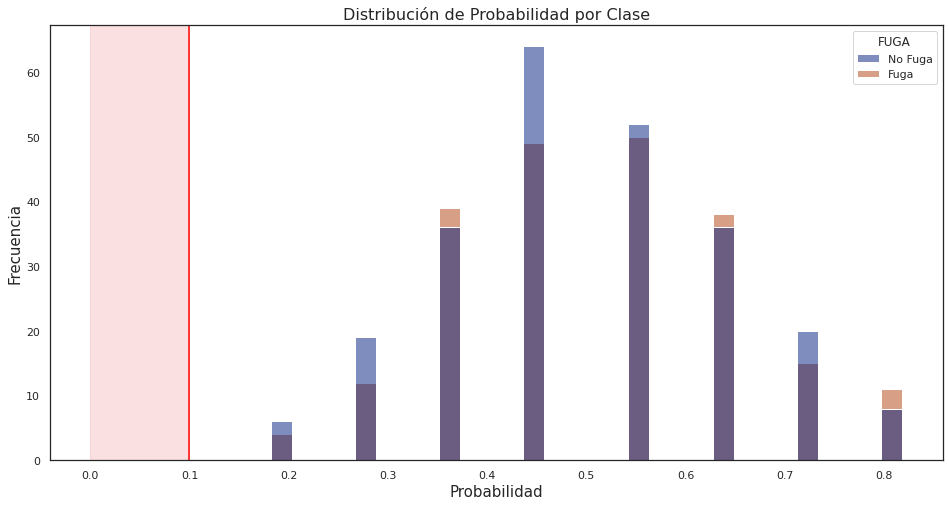

In [ ]:
plt.figure(figsize=(16, 8))
# Probabilidad estimada para caer en default, para ambas poblaciones
ax = sns.histplot(x = "Fuga" , hue='FUGA', data = DFKNNt, kde=False, bins=30, palette='dark')
plt.title('Distribución de Probabilidad por Clase', fontsize=16)
ax.set_xlabel('Probabilidad', fontsize=15)
ax.set_ylabel('Frecuencia', fontsize=15)
# marcar zona en predict = NO
ax.axvline(x=threshold1t, color='r')
ax.axvspan(0,threshold1t, color='#EF9A9A', alpha=0.3)

De la distribución de casos con y sin default recién mostrada, se exploran algunas variaciones para el umbral de corte de clases, llegando a la definición de que este se establece en 0.1.

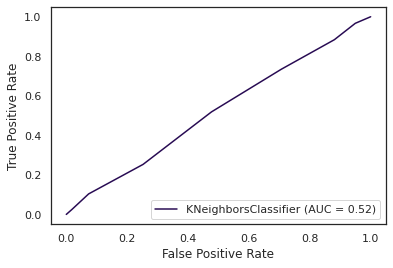

In [ ]:
# @title Gráfico ROC
metrics.plot_roc_curve(KNNauct, X_test, y_test)
plt.show()

Podemos observar que la curva ROC para KNN tiene un comportamiento casi lineal, entregando un AUC igual a 0.52, lo que no indica un modelo bastante deficiente en sus predicciones entregadas sobre la base de datos utilizada.

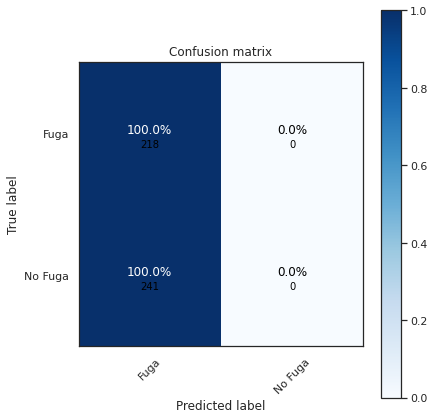

In [ ]:
get_cm(DFKNNt['FUGA'], DFKNNt['Predict'])

In [ ]:
# Positivo = Fuga
# Negativo = No FUga
tp = 218
fn = 0
fp = 241
tn = 0
FB = 1000 * tp - 100 * fp - 5000 * fn + 0 * tn
FB

193900

TP: true positive (predice fuga y en realidad fuga) \\
TN: true negative (predice no fuga y en realidad no fuga) \\
FP: false positive (predice fuga y en realidad no fuga) \\
FN: false negative (predice no fuga y en realidad fuga)

###### Modelo Árbol de Decisión

In [ ]:
# @title Determinación de Probabilidades de Predicción según Clases
# Entrenamos Árbol de Decisión con mejor configuración
TREEauct = DecisionTreeClassifier(random_state=0, max_depth = 6).fit(X_train,y_train)
# Calcular Probabilidades de Predicción
DFTREEt = DFTest.copy()
DFTREEt[['Fuga','No Fuga']] = TREEauct.predict_proba(X_test)
DFTREEt.head()

,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,0.946188,0.053812
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.000000,1.000000
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.946188,0.053812
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.000000,1.000000
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.733333,0.266667


In [ ]:
# @title Fijación de Umbral Probabilístico de Clases
# definimos el umbral desde el cual diremos que una persona pertenece a una clase u otra
threshold2t = 0.0
# creamos nueva columna de predicción
DFTREEt['Predict'] = np.where(DFTREEt['Fuga']>threshold2t, "Fuga", "No Fuga")
# métricas
print(f"Accuracy  : {round(accuracy_score(DFTREEt['FUGA'], DFTREEt['Predict']),3)}")
print(f"Precision : {round(precision_score(DFTREEt['FUGA'], DFTREEt['Predict'], average='macro'),3)}")
print(f"Recall    : {round(recall_score(DFTREEt['FUGA'], DFTREEt['Predict'], average='macro'),3)}")
DFTREEt.head()

Accuracy  : 0.769
Precision : 0.833
Recall    : 0.78


,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga,Predict
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,0.946188,0.053812,Fuga
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.000000,1.000000,No Fuga
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.946188,0.053812,Fuga
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.000000,1.000000,No Fuga
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.733333,0.266667,Fuga


Partiendo desde un umbral de corte de clases igual a 0.5, se revisa la distribución de casos y se define cambiar el valor de la probabilidad de corte a 0.0, reduciendo errores de asignación de clases para los casos que realmente se fugan.

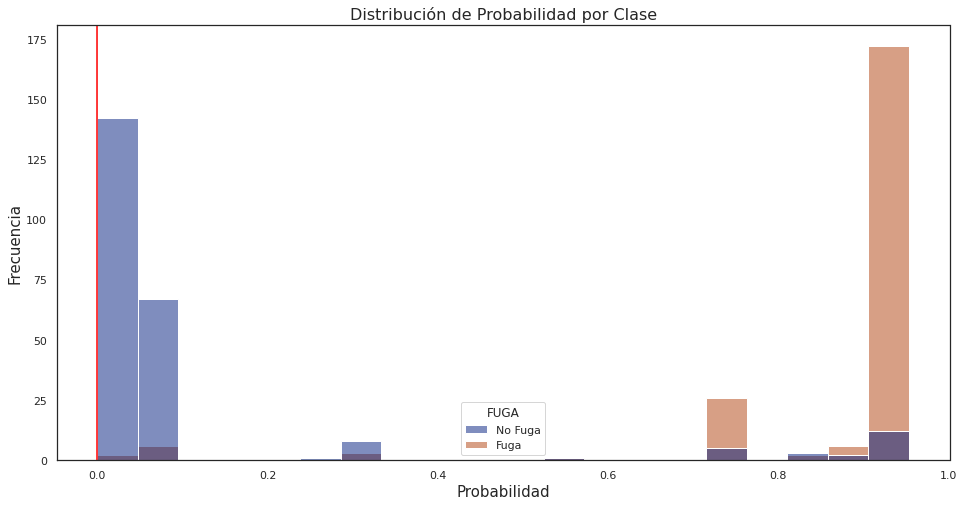

In [ ]:
plt.figure(figsize=(16, 8))
# Probabilidad estimada de tener diabetes, para ambas poblaciones
ax = sns.histplot(x = "Fuga" , hue='FUGA', data = DFTREEt, kde=False, bins=20, palette='dark')
plt.title('Distribución de Probabilidad por Clase', fontsize=16)
ax.set_xlabel('Probabilidad', fontsize=15)
ax.set_ylabel('Frecuencia', fontsize=15)
# marcar zona en predict = NO
ax.axvline(x=threshold2t, color='r')
ax.axvspan(0,threshold2t, color='#EF9A9A', alpha=0.3)

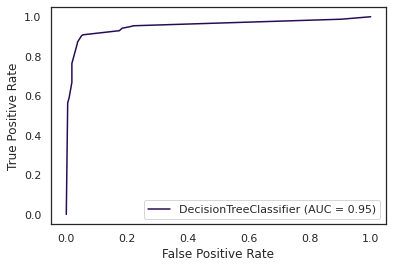

In [ ]:
# @title Gráfico ROC
metrics.plot_roc_curve(TREEauct, X_test, y_test)
plt.show()

En la curva ROC anterior se obtiene un AUC igual a 0.95 para el modelo Árbol de Decisión en el conjunto de Testeo, lo que representa un resultado de alto desempeño para el distinto abanico de umbrales de corte posibles. De este modo, tenemos un modelo que funciona de buena manera, sin haber caído en sobreajuste.

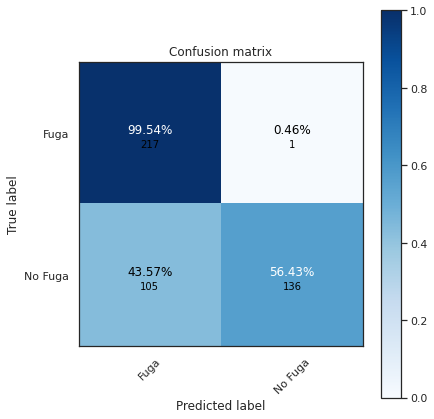

In [ ]:
get_cm(DFTREEt['FUGA'], DFTREEt['Predict'])

In [ ]:
tp1 = 217
fn1 = 1
fp1 = 105
tn1 = 136
FB1 = (1000 * tp1) +(-100 * fp1) + (-5000 * fn1) + (0 * tn1)
FB1

201500

###### Modelo SVM

In [ ]:
# @title Determinación de Probabilidades de Predicción según Clases
# Entrenamos SVM con mejor configuración
SVMauct = SVC(random_state=0, C=0.75, kernel='linear', probability=True).fit(X_train,y_train)
# Calcular Probabilidades de Predicción
DFSVMt = DFTest.copy()
DFSVMt[['Fuga','No Fuga']] = SVMauct.predict_proba(X_test)
DFSVMt.head()

,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,0.961884,0.038116
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.000017,0.999983
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.949186,0.050814
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.223871,0.776129
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.896403,0.103597


In [ ]:
# @title Fijación de Umbral Probabilístico de Clases
# definimos el umbral desde el cual diremos que una persona pertenece a una clase u otra
threshold3t = 0.06
# creamos nueva columna de predicción
DFSVMt['Predict'] = np.where(DFSVMt['Fuga']>threshold3t, "Fuga", "No Fuga")
# métricas
print(f"Accuracy  : {round(accuracy_score(DFSVMt['FUGA'], DFSVMt['Predict']),3)}")
print(f"Precision : {round(precision_score(DFSVMt['FUGA'], DFSVMt['Predict'], average='macro'),3)}")
print(f"Recall    : {round(recall_score(DFSVMt['FUGA'], DFSVMt['Predict'], average='macro'),3)}")
DFSVMt.head()

Accuracy  : 0.678
Precision : 0.798
Recall    : 0.693


,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga,Predict
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,0.961884,0.038116,Fuga
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.000017,0.999983,No Fuga
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.949186,0.050814,Fuga
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.223871,0.776129,Fuga
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.896403,0.103597,Fuga


Desde el umbral de corte inicial en clases equiprobables, se modifica el punto de discrimianción a 0.06, basado en la distribución de casos, reduciendo los casos de errores de clasificación para los casos que representan mayor costo para la organización.

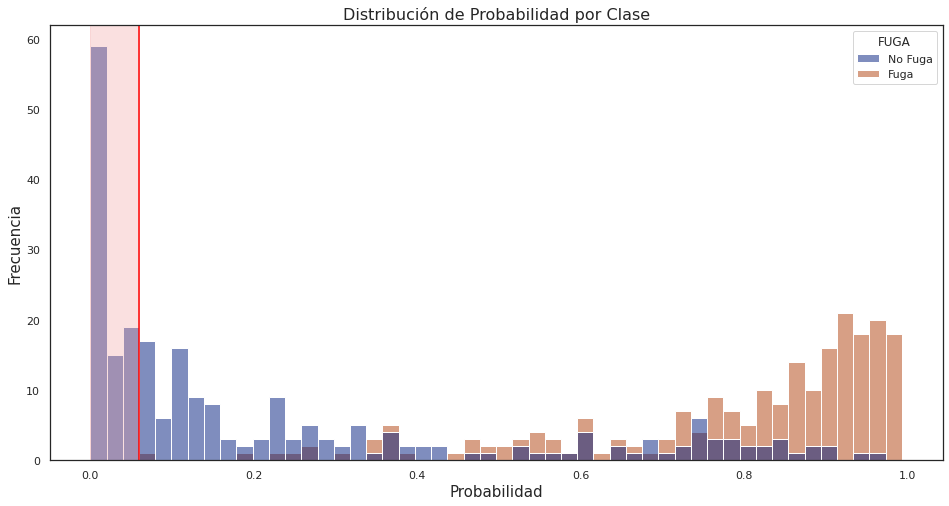

In [ ]:
plt.figure(figsize=(16, 8))
# Probabilidad estimada de tener diabetes, para ambas poblaciones
ax = sns.histplot(x = "Fuga" , hue='FUGA', data = DFSVMt, kde=False, bins=50, palette='dark')
plt.title('Distribución de Probabilidad por Clase', fontsize=16)
ax.set_xlabel('Probabilidad', fontsize=15)
ax.set_ylabel('Frecuencia', fontsize=15)
# marcar zona en predict = NO
ax.axvline(x=threshold3t, color='r')
ax.axvspan(0,threshold3t, color='#EF9A9A', alpha=0.3)

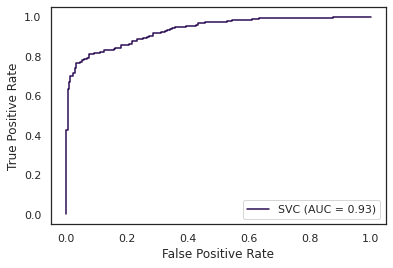

In [ ]:
# @title Gráfico ROC
metrics.plot_roc_curve(SVMauct, X_test, y_test)
plt.show()

Del gráfico anterior, se obtiene en el conjunto de Testeo, un AUC igual a 0.93 para SVM, mostrando buenos desempeños para los distintos umbrales de corte posibles.

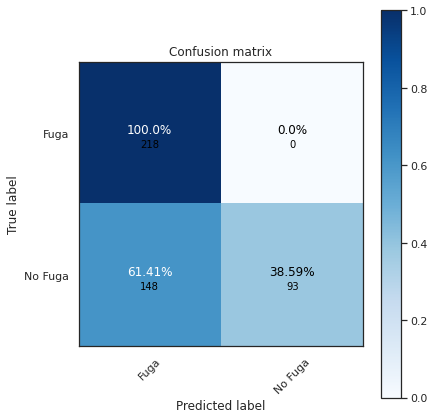

In [ ]:
get_cm(DFSVMt['FUGA'], DFSVMt['Predict'])

In [ ]:
tps = 218
fns = 0
fps = 148
tns = 93
FBs = (1000 * tps) +(-100 * fps) + (-5000 * fns) + (0 * tns)
FBs

203200

###### Modelo Random Forest

In [ ]:
# @title Determinación de Probabilidades de Predicción según Clases
# Entrenamos Random Forest con mejor configuración
RFauct = RandomForestClassifier(n_estimators=16, random_state=0, n_jobs=-1).fit(X_train,y_train)
# Calcular Probabilidades de Predicción
DFRFt = DFTest.copy()
DFRFt[['Fuga','No Fuga']] = RFauct.predict_proba(X_test)
DFRFt.head()

,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,1.0000,0.0000
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.0000,1.0000
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.9375,0.0625
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.0000,1.0000
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.8750,0.1250


In [ ]:
# @title Fijación de Umbral Probabilístico de Clases
# definimos el umbral desde el cual diremos que una persona pertenece a una clase u otra
threshold4t = 0.03
# creamos nueva columna de predicción
DFRFt['Predict'] = np.where(DFRFt['Fuga']>threshold4t, "Fuga", "No Fuga")
# métricas
print(f"Accuracy  : {round(accuracy_score(DFRFt['FUGA'], DFRFt['Predict']),3)}")
print(f"Precision : {round(precision_score(DFRFt['FUGA'], DFRFt['Predict'], average='macro'),3)}")
print(f"Recall    : {round(recall_score(DFRFt['FUGA'], DFRFt['Predict'], average='macro'),3)}")
DFRFt.head()

Accuracy  : 0.651
Precision : 0.788
Recall    : 0.668


,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga,Predict
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,1.0000,0.0000,Fuga
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.0000,1.0000,No Fuga
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.9375,0.0625,Fuga
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.0000,1.0000,No Fuga
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.8750,0.1250,Fuga


Al igual que en los casos anteriores, para Random Forest se parte con un umbral de corte igual a 0.5, el que después es ajustado en vista de la distribución de las observaciones del conjunto de Testeo, llevando el nuevo umbral hasta 0.03, parámetro en que el modelo entrega resultados sin errores de tipo Falsos Negativos.

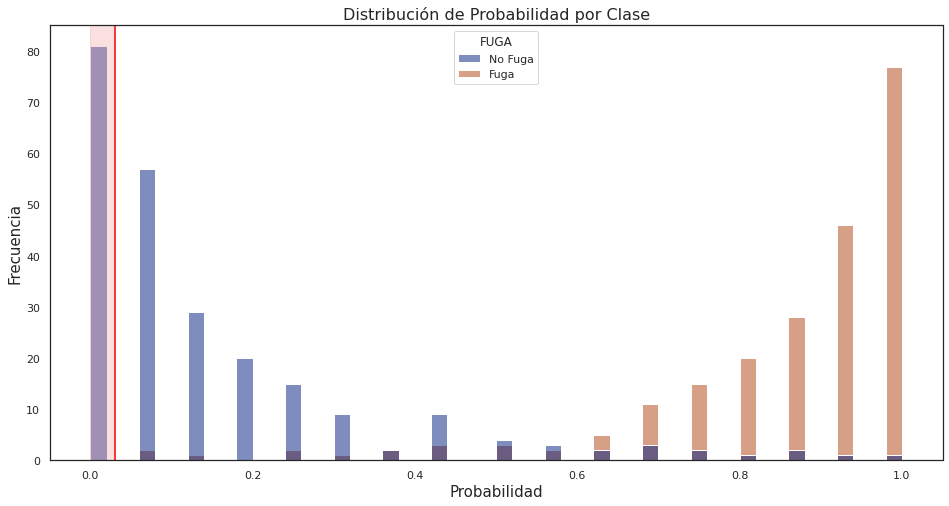

In [ ]:
plt.figure(figsize=(16, 8))
# Probabilidad estimada de tener diabetes, para ambas poblaciones
ax = sns.histplot(x = "Fuga" , hue='FUGA', data = DFRFt, kde=False, bins=50, palette='dark')
plt.title('Distribución de Probabilidad por Clase', fontsize=16)
ax.set_xlabel('Probabilidad', fontsize=15)
ax.set_ylabel('Frecuencia', fontsize=15)
# marcar zona en predict = NO
ax.axvline(x=threshold4t, color='r')
ax.axvspan(0,threshold4t, color='#EF9A9A', alpha=0.3)

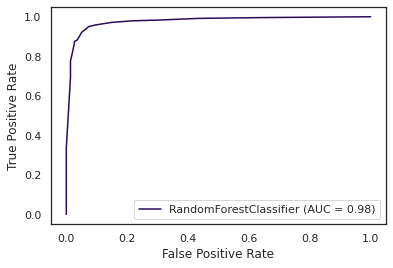

In [ ]:
# @title Gráfico ROC
metrics.plot_roc_curve(RFauct, X_test, y_test)
plt.show()

Del gráfico anterior, se obtiene un AUC de 0.98 para Random Forest en el conjunto de Testeo, acercándolo casi a un predictor perfecto. Habiendo descartado el sobreajuste, este modelo se presenta como una de las opciones principales para utilizar como clasificador, puesto que entrega resultados de alto desempeño para todo el espectro de umbrales posibles, con muy buenos resultados en la clase más crítica en cuanto a costo para la organización.

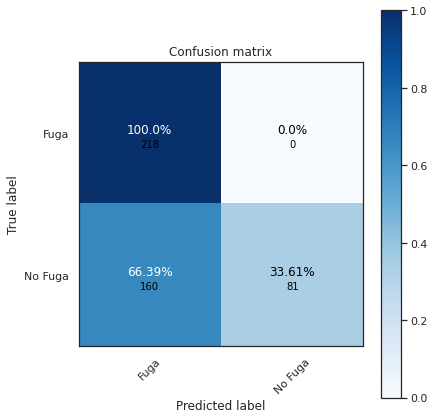

In [ ]:
get_cm(DFRFt['FUGA'], DFRFt['Predict'])

In [ ]:
tp2 = 218
fn2 = 0
fp2 = 160
tn2 = 81
FB2 = (1000 * tp2) +(-100 * fp2) + (-5000 * fn2) + (0 * tn2)
FB2

202000

###### Modelo Regresión Logística

In [ ]:
# @title Determinación de Probabilidades de Predicción según Clases
# Entrenamos Random Forest con mejor configuración
LOGITauct = LogisticRegression(random_state=0).fit(X_train, y_train)
# Calcular Probabilidades de Predicción
DFLOGITt = DFTest
DFLOGITt[['Fuga','No Fuga']] = LOGITauct.predict_proba(X_test)
DFLOGITt.head()

,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,0.929275,0.070725
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.034376,0.965624
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.932867,0.067133
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.392262,0.607738
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.807809,0.192191


In [ ]:
# @title Fijación de Umbral Probabilístico de Clases
# definimos el umbral desde el cual diremos que una persona pertenece a una clase u otra
threshold5t = 0.05
# creamos nueva columna de predicción
DFLOGITt['Predict'] = np.where(DFLOGITt['Fuga']>threshold5t, "Fuga", "No Fuga")
# métricas
print(f"Accuracy  : {round(accuracy_score(DFLOGITt['FUGA'], DFLOGITt['Predict']),3)}")
print(f"Precision : {round(precision_score(DFLOGITt['FUGA'], DFLOGITt['Predict'], average='macro'),3)}")
print(f"Recall    : {round(recall_score(DFLOGITt['FUGA'], DFLOGITt['Predict'], average='macro'),3)}")
DFLOGITt.head()

Accuracy  : 0.608
Precision : 0.774
Recall    : 0.627


,CIUDAD,EDAD,E_CIVIL,Frecuencia,GENERO,ID,MONTO,M_MOROSO,NIV_EDUC,Recency,SEGURO,Unnamed: 0,logDMax/Renta,logMTD/Renta,logVM_AbrilMarzo,logVM_AgostoJulio,logVM_JulioJunio,logVM_JunioMayo,logVM_MayoAbril,logVM_SeptiembreAgosto,FUGA,Fuga,No Fuga,Predict
508,0.013514,0.780488,0.333333,0.571429,0.0,0.221544,0.213333,0.333333,1.0,1.0,1.0,508,0.057893,0.060928,0.637769,0.009337,0.000003,0.748740,2.995236e-06,0.407134,No Fuga,0.929275,0.070725,Fuga
325,0.540541,0.658537,0.333333,0.000000,1.0,0.141736,0.200000,0.000000,0.6,0.0,1.0,325,0.320478,0.000000,0.044663,0.061473,0.075726,0.041155,4.143709e-02,0.058642,No Fuga,0.034376,0.965624,No Fuga
304,0.013514,0.682927,0.000000,0.857143,0.0,0.132577,0.493333,0.333333,1.0,1.0,0.0,304,0.891262,0.896149,0.000104,0.430705,0.000010,0.659855,2.388722e-05,0.027990,Fuga,0.932867,0.067133,Fuga
1034,0.432432,0.634146,0.000000,0.571429,0.0,0.450938,1.000000,0.666667,0.6,1.0,0.0,1034,0.062439,0.076647,0.746625,0.001411,0.000018,0.762699,5.441383e-07,0.740365,No Fuga,0.392262,0.607738,Fuga
929,0.013514,0.512195,0.666667,0.571429,0.0,0.405146,0.840000,0.666667,1.0,1.0,0.0,929,0.008030,0.008275,0.537420,0.000518,0.000130,0.703938,1.425839e-05,0.475820,Fuga,0.807809,0.192191,Fuga


Para el presente modelo, mediante la inspección de la distribución de observaciones, se ajusta el umbral de corte de clases desde 0.5 a 0.05, entregando excelentes resultados en cuanto a la disminución de Falsos Negativos.

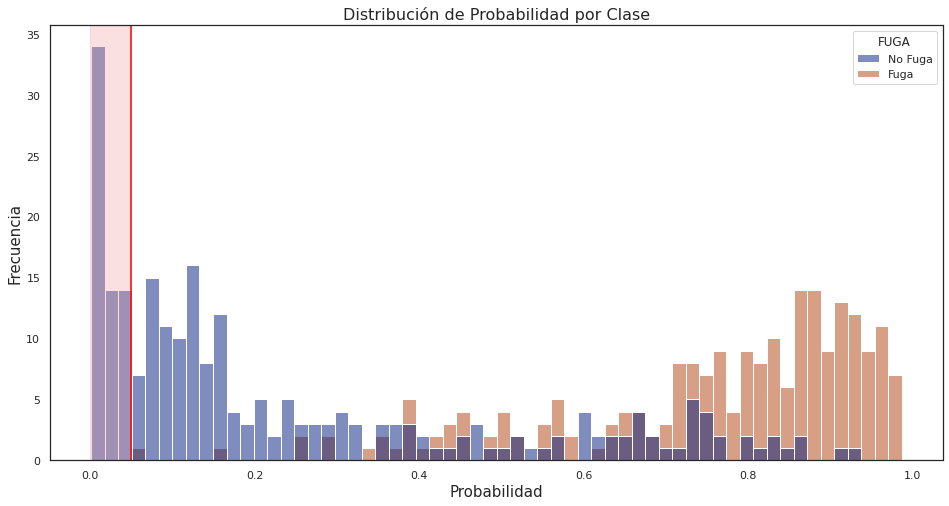

In [ ]:
plt.figure(figsize=(16, 8))
# Probabilidad estimada para caer en default, para ambas poblaciones
ax = sns.histplot(x = "Fuga" , hue='FUGA', data = DFLOGITt, kde=False, bins=60, palette='dark')
plt.title('Distribución de Probabilidad por Clase', fontsize=16)
ax.set_xlabel('Probabilidad', fontsize=15)
ax.set_ylabel('Frecuencia', fontsize=15)
# marcar zona en predict = NO
ax.axvline(x=threshold5t, color='r')
ax.axvspan(0,threshold5t, color='#EF9A9A', alpha=0.3)

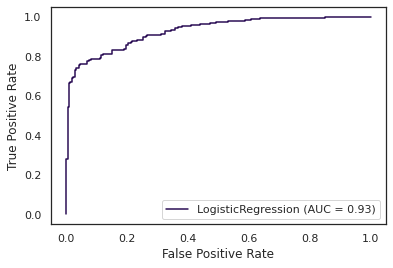

In [ ]:
# @title Gráfico ROC
metrics.plot_roc_curve(LOGITauct, X_test, y_test)
plt.show()

Del la curva ROC anterior, se obtiene un AUC igual a 0.93 para la Regresión Logística en el conjunto de Testeo, indicando que el modelo se comporta bien en los distintos umbrales de corte posibles a utilizar, puntualmente, generando cero errores de Falsos Negativos para el punto de corte ya seleccionado anteriormente.

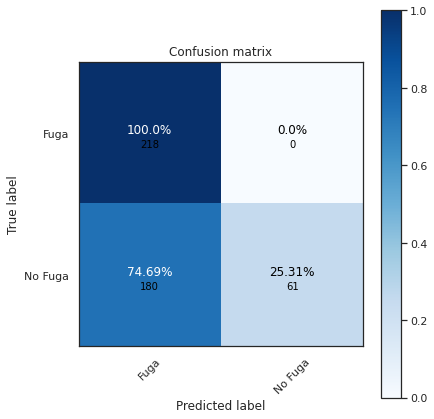

In [ ]:
get_cm(DFLOGITt['FUGA'], DFLOGITt['Predict'])

In [ ]:
tp3 = 218
fn3 = 0
fp3 = 180
tn3 = 61
FB3 = (1000 * tp3) +(-100 * fp3) + (-5000 * fn3) + (0 * tn3)
FB3

200000

In [ ]:
# @title Cuadro Resumen de Función de Beneficios
Modelos = ['KNN', 'Árbol de Decisión', 'SVM', 'Random Forest', 'Regresión Logística']
Umbrales = [0.1, 0.0, 0.06, 0.03, 0.05]
BeneficiosTotales = [193900, 201500, 203200, 202000, 200000]
ResumenBeneficios = pd.DataFrame({'Modelo': Modelos, 'Umbral': Umbrales, 'Beneficio Total': BeneficiosTotales})
ResumenBeneficios

,Modelo,Umbral,Beneficio Total
0,KNN,0.10,193900
1,Árbol de Decisión,0.00,201500
2,SVM,0.06,203200
3,Random Forest,0.03,202000
4,Regresión Logística,0.05,200000


Del cuadro resumen anterior, podemos observar que los mejores resultados económicos se obtienen para distintos umbrales dependiendo del modelo en cuestión, todos con valores entre 0.1 y 0.0, recordando que el enfoque es eliminar los errores de predicción, especialmente los falsos negativos.

Particularmente, el mayor beneficio se obtiene para SVM, con un valor de $203.200, seguido por Random Forest, con solo mil doscientos pesos menos.

De este modo, desde la perspectiva de beneficio económico para el negocio, es SVM el mejor algotirmo.

COMPARACIÓN CRUZADA

In [ ]:
# @title Definición de Función de Comparación Cruzada
def train_cv(models, X_train, y_train, method):
  entries = []
  # iteramos sobre los modelos, evaluando en cada iteración
  for name, model in models.items():
    print(f"Train {name}")
    AUC = cross_val_score(model, X_train, y_train, scoring ='roc_auc', cv=10, n_jobs =-1)
    for fold_idx, auc in enumerate(AUC):
        entries.append((name, fold_idx, auc, method))
        cv_results = pd.DataFrame(entries, columns=['Model', 'fold', 'AUC', 'Method'])
  return cv_results

In [ ]:
# @title Establecimiento de Línea Base de Comparación
# Generación de Diccionario de Modelos
DModelos = {"KNN": KNeighborsClassifier(n_neighbors=11), "TREE": DecisionTreeClassifier(random_state=0, max_depth = 6), "SVM": SVC(random_state=0, C=0.75, kernel='linear', probability=True), "RF": RandomForestClassifier(n_estimators=16, random_state=0, n_jobs=-1), "LOGIT": LogisticRegression(random_state=0)}
# Validación Cruzada de Modelos para Entrenamiento
#print("Entrenamiento")
#CVTrain = train_cv(DModelos, X_train, y_train, 'Línea Base Entrenamiento')
# Validación Cruzadade Modelos para Testeo
print("Testeo")
CVTest = train_cv(DModelos, X_test, y_test, 'Línea Base Testeo')

Testeo
Train KNN
Train TREE
Train SVM
Train RF
Train LOGIT


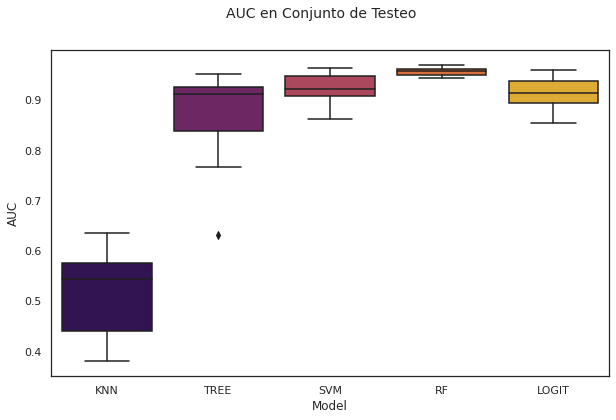

In [ ]:
# @title Gráfica de Línea Base de Comparación en Testeo
plt.figure(figsize=(10, 6))
plt.suptitle("AUC en Conjunto de Testeo", fontsize=14)
sns.boxplot(x='Model', y='AUC', data=CVTest, palette='inferno')

Para la elección de un modelo predictivo desde la perspectiva netamente técnica, sabemos que el AUC es la función de pérdida que nos orienta sobre el desempeño global del algoritmo, para todos sus umbrales de predicción de clases posibles.

Del gráfico anterior, tenemos que el modelo que entrega los mejores resutados máximos, los mejores resultados mínimos, la mediana más alta y la menor variabilidad en sus predicciones, es el Random Forest. Aquí cabe señalar que en el entrenamiento previo del modelo, ya se descartó la condición de sobreajuste del clasificador.

A su vez, tenemos que el segundo y tercer mejor modelo son SVM y Regresión Logística respectivamente, ambos con resultados bastante similares, pero con pequeñas diferencias a favor de SVM en cuanto a valores mínimos, mediana y variabilidad de sus resultados.

En cuarto lugar se presenta el Árbol de Decisión, que se aprecia fácilmente que entrega resultados más bajos para sus máximos, mínimos y mediana, así como una mayor variabilidad, mencionando sin embargo, que a nivel de magnitudes, el modelo entrega resultados con un AUC superior a 0.75 en sus casos más desfavorables.

Por último, el modelo KNN es por lejos el de peor desempeño potencial para todos sus umbrales evaluados, llegando a entregar resultados menores a 0.5, lo que se podría interpretar como funcionamientos peores a los de lanzar una moneda, para clasificar clientes en algunos escenarios.



# Selección de Modelo Predictivo de Clasificación
En vista de los resultados antes obtenidos, tenemos lo siguiente:


*   Desde una perspectiva económica, los mejores modelos son SVM, seguido muy de cerca por Random Forest.
*   En cuanto al desempeño potencial, medido por la función de pérdida AUC, los mejores modelos son Random Forest, seguido por SVM; donde los peores resultados de Random Forest son cercanos al tercer cuartil de SVM.
*   Los modelos Random Forest y SVM actúan como una "caja negra" en cuanto a su interpretabilidad, de modo que ninguno se diferencia o supera al otro en este aspecto.
*   Para el funcionamiento de los modelos, es decir, para su entrenamiento, testeo y cálculo de probabilidades de clases, Random Forest utiliza muchos menos recursos de cómputo, entregando sus resultados de manera más rápida.

En vista de lo anterior, sumado a que el modelo seleccionado será expuesto a predecir en una nueva base de datos desconocida hasta ahora, para la cual además no será posible ajustar de manera óptima el umbral de corte de probabilidades de clases, es que la elección del algoritmo se inclina a favor de Random Forest.

